## Data :Netflix Movies and TV Shows
* 넷플릭스에서 2008년부터 2021년 9월까지 올라온 영화, TV Show 데이터
* Data From : https://www.kaggle.com/datasets/shivamb/netflix-shows

## 1. 데이터 둘러보기

* 기본 패키지 불러오기

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

* 데이터 불러오기

In [2]:
net = pd.read_csv("netflix_titles.csv")

In [4]:
net.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


<컬럼 설명>
* show_id : 개별 id
* type : 타입
* title : 제목
* director : 감독
* cast : 배우들
* country : 제작 국가
* date_added : Netflix에 추가된 날짜
* release_year : 영화/TV 쇼 개봉 날짜
* duration : 영상 길이/시즌
* listed_in : 장르
* description : 설명

## 2. 질문하기

* 타입별 퍼센트는 얼마나 되는가?
* 타입별 감독 작품개수는?
* 어느 국가에서 컨텐츠를 많이 제작하였나?
* 타입별 날짜에 따라 넷플릭스에 추가된 컨텐츠의 양은?
* 타입별 출시 연령 비율은 어떻게 되는가?
* 영화컨텐츠를 많이 제작한 감독들중 개봉부터 넷플릭스 출시 평균 기간은?
* 가장 많은 제작 국가 별 제작 등급은?
* 연령별 영상길이는 어떤가?

## 3. 데이터 전처리

#### 데이터 기본 정보 확인하기

In [5]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 데이터 중복 확인하기

In [16]:
net.duplicated().sum()

0

#### Netflix에 추가된 날짜 날짜 타입으로 변경후 해당년도로 추가 컬럼 생성

In [3]:
net['date_added'] = pd.to_datetime(net['date_added'])
net['date_added_year'] = net['date_added'].dt.year

#### 등급별 종류를 간단히 재정렬하기

In [4]:
rate = []
for i in net['rating']:
    if i == 'PG' or i == 'TV-Y' or i == 'TV-Y7' or i == 'TV=G' or i == 'G' or   i == 'TV-Y7-FV':
        rate.append('children')
    elif i == 'PG-13'or i == 'TV-14':
        rate.append('student')
    else:
        rate.append('adult')
net['rate'] = rate

#### 영화나 TV쇼가 출시되고 Netflix에 추가된 기간

In [21]:
net['release_period'] = net['date_added_year']- net['release_year']

#### 영화상영시간을 연속형 변수로 수정, TV 쇼인 경우 0으로 변경

In [30]:
net['movie_duration'] = net[net['type'] == 'Movie']['duration'].str.replace("min","")
net['movie_duration'].fillna(0,inplace = True)
net['movie_duration'] = net['movie_duration'].astype(int)

In [31]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating           8803 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  date_added_year  8797 non-null   float64       
 13  rate             8807 non-null   object        
 14  release_period   8797 non-null   float64

In [35]:
print("총 데이터 수 : ",net.shape[0]* net.shape[1])
print("총 결측치 수 : {}, 전체 데이터의 {:.2f}%" .format(net.isnull().sum().sum(),(net.isnull().sum().sum()*100)/(net.shape[0]* net.shape[1])))
print("영상 개봉 기간 {} ~ {}".format(net['release_year'].min(),net['release_year'].max() ))


총 데이터 수 :  140912
총 결측치 수 : 4327, 전체 데이터의 3.07%
영상 개봉 기간 1925 ~ 2021


## 4. EDA

#### Q1 : 타입별 퍼센트는 얼마나 되는가?

In [37]:
net['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

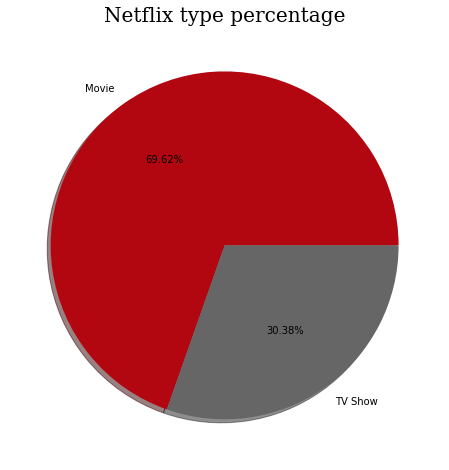

In [38]:
f,ax = plt.subplots(1,1,figsize = (8,8))
color_list = ['#b20710','#666666']
plt.pie(net['type'].value_counts(), labels = net['type'].unique(),colors = color_list,shadow = True,
       autopct='%0.2f%%');
plt.title ("Netflix type percentage",fontfamily='serif',fontsize = 20);

A1 : 영화가 전체 69.62%를 차지하고 TV Show는 30.38%를 차지하여,  
     기간내에 영화컨텐츠가 더 많이 넷플릭스에 추가되었다.

#### Q2 : 타입별 감독 작품개수는?

In [12]:
net_type_d = net.groupby(['type'])['director'].value_counts().reset_index(name = 'counts')
net_type_d_m = net_type_d[net_type_d['type'] == 'Movie'].head(5)
net_type_d_m

,type,director,counts
0,Movie,Rajiv Chilaka,19
1,Movie,"Raúl Campos, Jan Suter",18
2,Movie,Suhas Kadav,16
3,Movie,Marcus Raboy,15
4,Movie,Jay Karas,14


In [48]:
net_type_d_t = net_type_d[net_type_d['type'] == 'TV Show'].head(5)
net_type_d_t

,type,director,counts
4354,TV Show,Alastair Fothergill,3
4355,TV Show,Hsu Fu-chun,2
4356,TV Show,Iginio Straffi,2
4357,TV Show,Ken Burns,2
4358,TV Show,Rob Seidenglanz,2


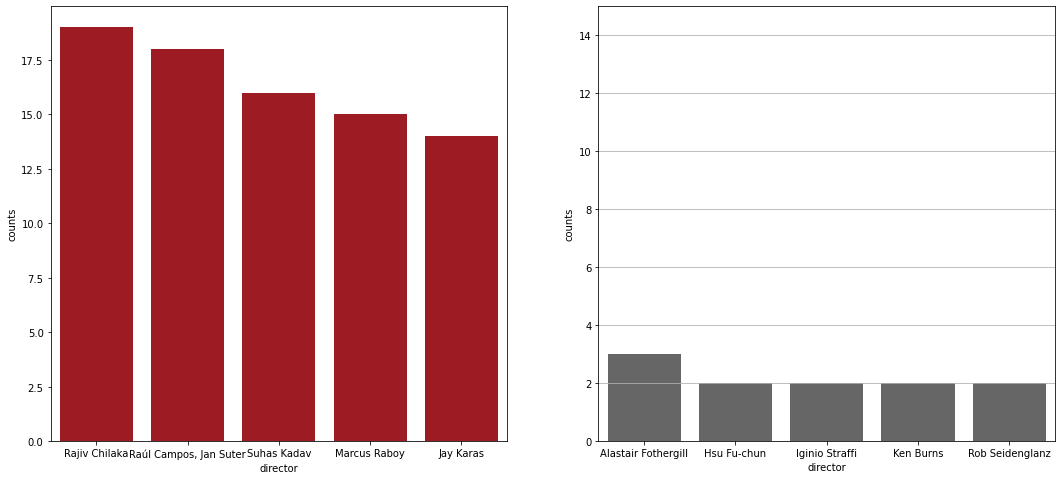

In [54]:
f,ax = plt.subplots(1,2 ,figsize = (18,8))
sns.barplot(data = net_type_d_m, x = 'director',y = 'counts', ax = ax[0], color = '#b20710')
plt.grid()
sns.barplot(data = net_type_d_t, x = 'director',y = 'counts', ax = ax[1],color = '#666666')
plt.grid(True,axis = 'y')
plt.ylim([0,15]);

A2 : 영화는 Rajiv Chilaka, Raúl Campos, Jan Suter,Suhas Kadav, Marcus Raboy, Jay Karas 감독순으로   
작품을 많이 개봉하였고,  
TV Show는 Alastair Fothergill, Hsu Fu-chun, Iginio Straffi, Ken Burns, Rob Seidenglanz 감독순으로   
작품을 많이 개봉하였다.

#### Q3 :  어느 국가에서 컨텐츠를 많이 제작하였나?

In [25]:
net_type_c = net.groupby(['type'])['country'].value_counts().reset_index(name = 'counts')
net_type_c_m = net_type_c[net_type_c['type'] == 'Movie'].head(5)
net_type_c_m

,type,country,counts
0,Movie,United States,2058
1,Movie,India,893
2,Movie,United Kingdom,206
3,Movie,Canada,122
4,Movie,Spain,97


In [24]:
net_type_c_t = net_type_c[net_type_c['type'] == 'TV Show'].head(5)
net_type_c_t

,type,country,counts
651,TV Show,United States,760
652,TV Show,United Kingdom,213
653,TV Show,Japan,169
654,TV Show,South Korea,158
655,TV Show,India,79


In [28]:
net_type_c_mt = pd.concat([net_type_c_m,net_type_c_t])
net_type_c_mt

,type,country,counts
0,Movie,United States,2058
1,Movie,India,893
2,Movie,United Kingdom,206
3,Movie,Canada,122
4,Movie,Spain,97
651,TV Show,United States,760
652,TV Show,United Kingdom,213
653,TV Show,Japan,169
654,TV Show,South Korea,158
655,TV Show,India,79


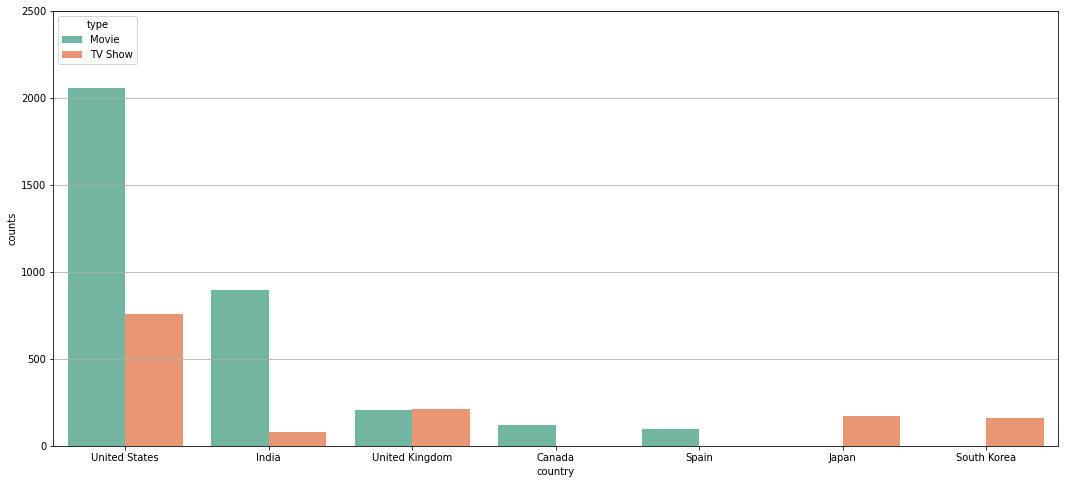

In [46]:
f,ax = plt.subplots(figsize = (18,8))
sns.barplot(data = net_type_c_mt, x = 'country',y = 'counts',palette = 'Set2',hue = 'type')
plt.grid(True, axis = 'y')
plt.ylim([0,2500]);

A3 : 영화 컨텐츠일 경우에는 영어권 국가들이 많이 제작하고있고,  
TV Show는 영어권 국가외에도 동아시아국가들이 많이 제작하여 공급하고 있다.

#### Q4 : 타입별 날짜에 따라 넷플릭스에 추가된 컨텐츠의 양은?

In [63]:
net_type_dy = net.groupby(['type'])['date_added_year'].value_counts().reset_index(name = 'counts').sort_values(by = ['type','date_added_year'])
net_type_dy

,type,date_added_year,counts
12,Movie,2008.0,1
11,Movie,2009.0,2
13,Movie,2010.0,1
8,Movie,2011.0,13
10,Movie,2012.0,3
9,Movie,2013.0,6
7,Movie,2014.0,19
6,Movie,2015.0,56
5,Movie,2016.0,253
4,Movie,2017.0,839


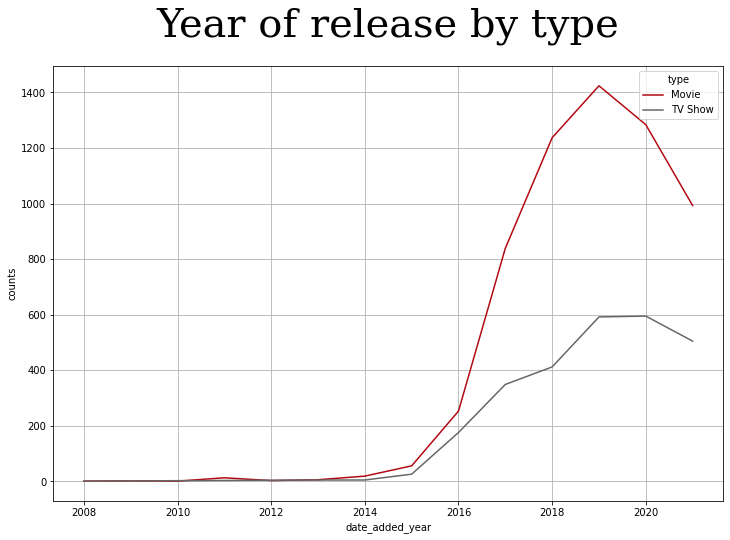

In [67]:
f,ax = plt.subplots(1,1 ,figsize = (12,8))
color_list = ['#b20710','#666666']
sns.lineplot(data = net_type_dy, x = 'date_added_year', y = 'counts',hue = 'type',palette = color_list)
plt.title("Year of release by type",fontfamily='serif',fontsize = 40,loc='center', pad=30)
plt.grid()

A4 : OTT 시장이 활성화되기 시작한 2016년이후부터 증가 추세를 보이다가,  
2019년에 가장 많은 컨텐츠들이 넷플릭스로 유입되었다.

#### Q5 : 타입별 출시 연령 비율은 어떻게 되는가?

In [57]:
net_type_r = net.groupby(['type'])['rate'].value_counts().reset_index(name = 'counts')
net_type_r_m = net_type_r[net_type_r['type'] == 'Movie'].head(5)
net_type_r_m

,type,rate,counts
0,Movie,adult,3611
1,Movie,student,1917
2,Movie,children,603


In [58]:
net_type_r_t = net_type_r[net_type_r['type'] == 'TV Show'].head(5)
net_type_r_t

,type,rate,counts
3,TV Show,adult,1571
4,TV Show,student,733
5,TV Show,children,372


In [61]:
net_type_r_dt = pd.concat([net_type_r_m,net_type_r_t])
net_type_r_dt

,type,rate,counts
0,Movie,adult,3611
1,Movie,student,1917
2,Movie,children,603
3,TV Show,adult,1571
4,TV Show,student,733
5,TV Show,children,372


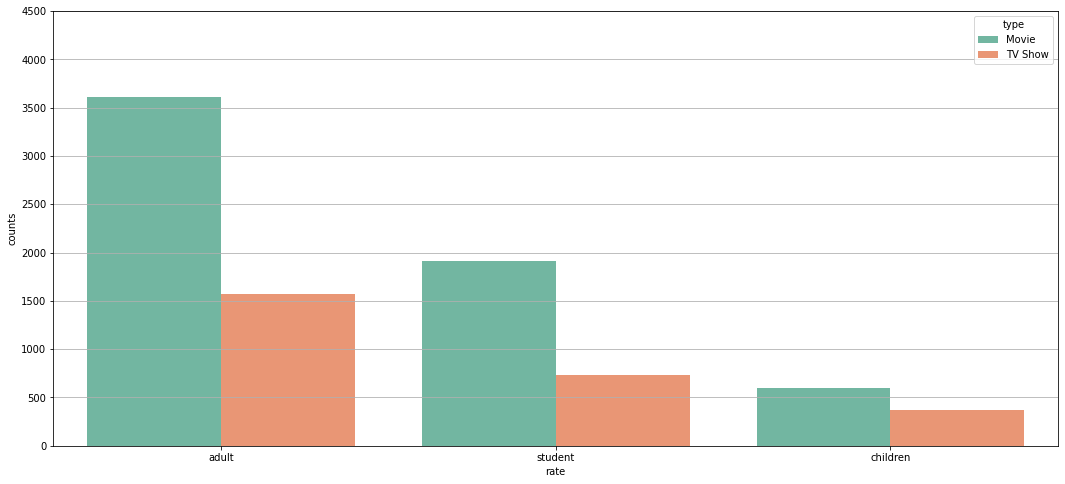

In [67]:
f,ax = plt.subplots(1,1 ,figsize = (18,8))
sns.barplot(data = net_type_r_dt, x = 'rate',y = 'counts', palette = 'Set2',hue = 'type')
plt.grid(True,axis = 'y')
plt.ylim([0,4500]);

A5 : 영화 컨텐츠일 경우 성인등급이 58.9%, 학생들이관람가능한 등급은 31.2%, 전체관람가는 9.9%으로   
OTT는 유료 서비스이기때문에 성인분들의 시청률이 높아서 주로 성인등급의 컨텐츠가 많은것으로 추정된다.  
TV Show 컨텐츠일 경우 성인등급이 58.7%, 학생들이관람가능한 등급은 27.4%, 전체관람가는 13.9%으로  
영화 컨텐츠와 마찬가지로 성인등급의 컨텐츠가 주로 제작된다.


#### Q6 : 영화컨텐츠를 많이 제작한 감독들중 개봉부터 넷플릭스 출시 평균 기간은 ?

In [100]:
net_d_r = net.groupby(['director'])['release_period'].mean().reset_index(name= 'r_p')
net_d_r.sort_values(by = 'r_p',ascending = False).head(10).round(3)

,director,r_p
1323,Frank Capra,75.000
1956,John Ford,74.500
1324,"Frank Capra, Anatole Litvak",74.000
4427,William Wyler,73.000
1325,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",73.000
4028,Stuart Heisler,73.000
1965,John Huston,72.333
1326,"Frank Capra, Joris Ivens",72.000
1416,George Stevens,72.000
3120,"Oscar Micheaux, Spencer Williams, Richard E. N...",71.000


In [103]:
net_d_r[net_d_r['director'].isin(net_type_d_m['director'])].round(3)

,director,r_p
685,Cathy Garcia-Molina,5.000
1787,Jay Chapman,2.000
1790,Jay Karas,0.714
2598,Marcus Raboy,0.375
2671,Martin Scorsese,23.333
3392,Rajiv Chilaka,8.474
3443,"Raúl Campos, Jan Suter",0.000
4020,Steven Spielberg,21.000
4046,Suhas Kadav,3.750
4480,Youssef Chahine,43.667


A6 : 대부분 감독들이 기간을 정해놓고 넷플릭스에 출시 하지는 않는다.  
가장 긴 기간으로는 영화 개봉하고 75년 후 넷플릭스에 합류한 작품도 존재한다.


#### Q7 : 가장 많은 제작 국가 별 제작 등급은?

In [115]:
net_c = net['country'].value_counts().head(5).reset_index(name = 'counts')
net_c

,index,counts
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [110]:
c_r = net.groupby(['country'])['rate'].value_counts().reset_index(name= 'counts')
c_r

,country,rate,counts
0,", France, Algeria",student,1
1,", South Korea",adult,1
2,Argentina,adult,47
3,Argentina,student,7
4,Argentina,children,2
...,...,...,...
921,"Venezuela, Colombia",adult,1
922,Vietnam,adult,4
923,Vietnam,student,3
924,West Germany,adult,1


In [114]:
c_r[c_r['country'].isin(net_c['index'])]

,country,rate,counts
307,India,student,554
308,India,adult,396
309,India,children,22
392,Japan,adult,128
393,Japan,student,94
394,Japan,children,23
539,South Korea,adult,105
540,South Korea,student,83
541,South Korea,children,11
623,United Kingdom,adult,313


<AxesSubplot: xlabel='country', ylabel='counts'>

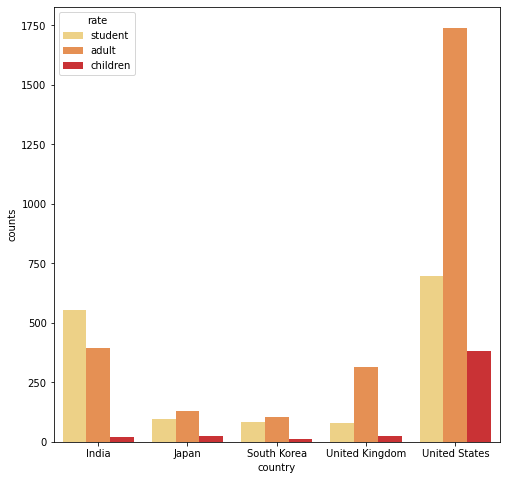

In [190]:
f,ax = plt.subplots(figsize = (8,8))
sns.barplot(data = c_r[c_r['country'].isin(net_c['index'])], x = 'country', y = 'counts',hue = 'rate',
            palette = 'YlOrRd' )

A7 : 인도를 제외한 국가에서는 성인등급의 영상을 주로 만들고 그다음으로 학생, 어린이순으로 만들지만,  
인도는 학생등급 컨텐츠를 제일 많이 만드는것으로 보아 자극적인 컨텐츠보다는   
아이들과 같이 볼수 있는 컨텐츠를 선호한다.

#### Q8 : 연령별 영상길이는 어떤가?

In [152]:
net_r_d = net[net['type'] == 'Movie'].groupby(['rate'])['movie_duration'].mean().round(0).reset_index()
#net_r_d['movie_duration'] = net_r_d['movie_duration'].astype(int)
net_r_d

,rate,movie_duration
0,adult,97.0
1,children,79.0
2,student,110.0


<AxesSubplot: xlabel='rate', ylabel='movie_duration'>

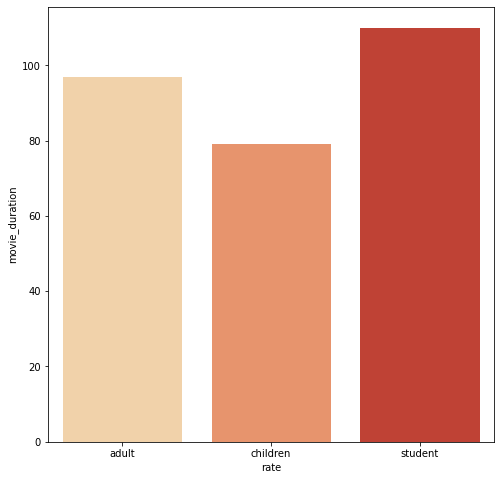

In [189]:
f,ax = plt.subplots(figsize = (8,8))
sns.barplot(data = net_r_d, x = 'rate', y = 'movie_duration' ,palette = 'OrRd')

A8 : 성인영화의 경우에는 다른 영화들보다는 자극적인 콘텐츠에 집중되어 있는 경향이 있어,  
스토리부분에서 완성도가 높지 못해 런닝타임이 학생등급보다는 짧고   
어린이용 영화인 경우는 수위조절에 신경써야되고 아이들이 아직 오래 집중을 하지 못하기 때문에  
다른 등급 영화에 비해 제일 런닝타임이 짧다.

## 5. 텍스트 클라우드

#### 패키지 불러오기

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [159]:
net.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,rate,release_period,movie_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,student,1.0,90


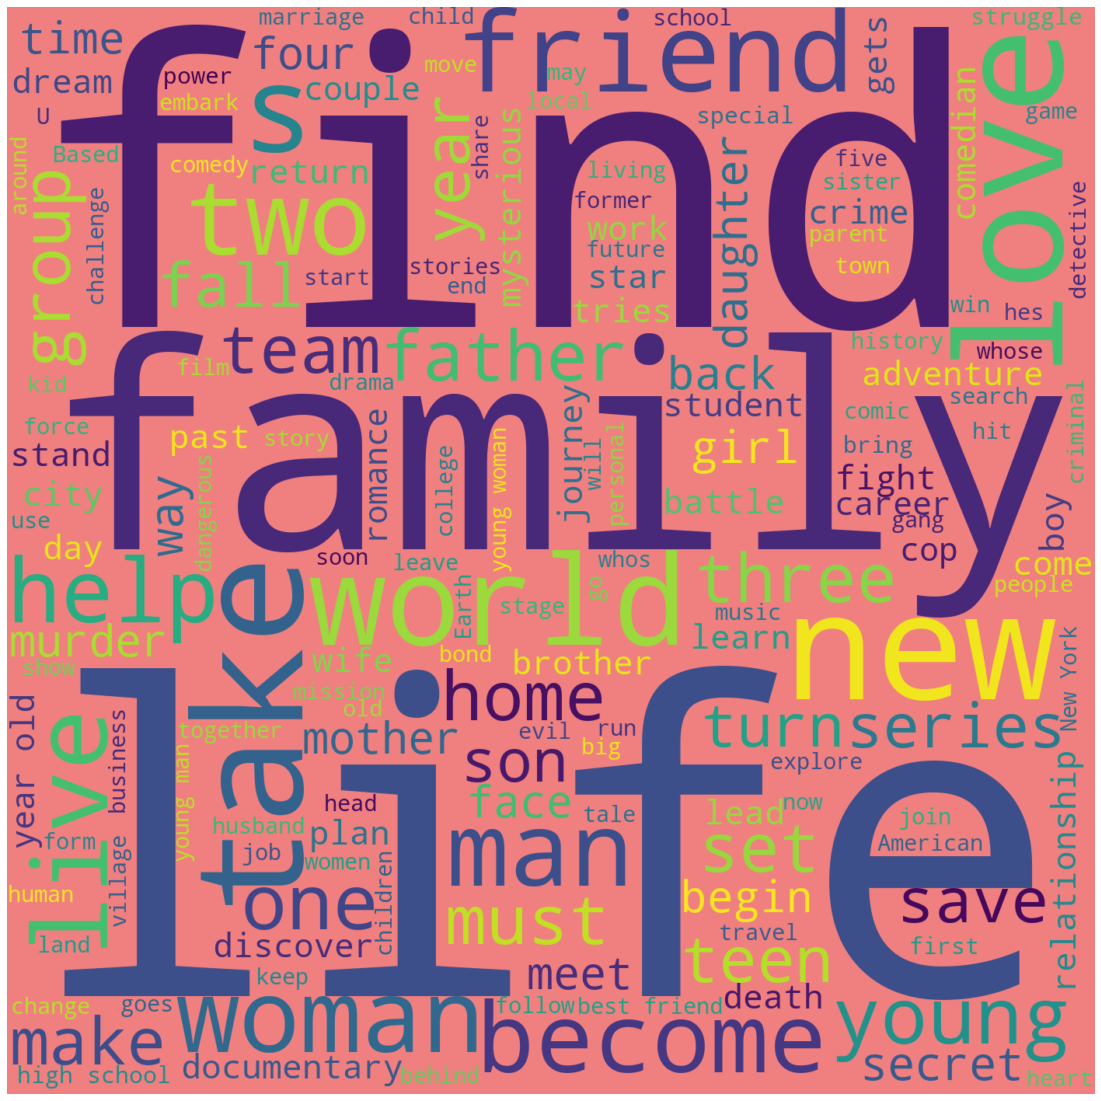

In [191]:
text = str(list(net['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = '#F08080', width = 1400,  height = 1400, max_words = 170).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 5. Result

* 타입별 퍼센트는 얼마나 되는가?  
 : 영화가 전체 69.62%를 차지하고 TV Show는 30.38%를 차지하여,  
 기간내에 영화컨텐츠가 더 많이 넷플릭스에 추가되었다.  
* 타입별 감독 작품개수는?  
 : 영화는 Rajiv Chilaka, Raúl Campos, Jan Suter,Suhas Kadav, Marcus Raboy, Jay Karas 감독순으로   
작품을 많이 개봉하였고,   
  TV Show는 Alastair Fothergill, Hsu Fu-chun, Iginio Straffi, Ken Burns, Rob Seidenglanz 감독순으로   
작품을 많이 개봉하였다.
* 어느 국가에서 컨텐츠를 많이 제작하였나?  
 : : 영화 컨텐츠일 경우에는 영어권 국가들이 많이 제작하고있고,  
TV Show는 영어권 국가외에도 동아시아국가들이 많이 제작하여 공급하고 있다.
* 타입별 날짜에 따라 넷플릭스에 추가된 컨텐츠의 양은?  
 : OTT 시장이 활성화되기 시작한 2016년이후부터 증가 추세를 보이다가,  
2019년에 가장 많은 컨텐츠들이 넷플릭스로 유입되었다.
* 타입별 출시 연령 비율은 어떻게 되는가?  
 :  영화 컨텐츠일 경우 성인등급이 58.9%, 학생들이관람가능한 등급은 31.2%, 전체관람가는 9.9%으로   
OTT는 유료 서비스이기때문에 성인분들의 시청률이 높아서 주로 성인등급의 컨텐츠가 많은것으로 추정된다.  
TV Show 컨텐츠일 경우 성인등급이 58.7%, 학생들이관람가능한 등급은 27.4%, 전체관람가는 13.9%으로  
영화 컨텐츠와 마찬가지로 성인등급의 컨텐츠가 주로 제작된다.
* 영화컨텐츠를 많이 제작한 감독들중 개봉부터 넷플릭스 출시 평균 기간은?  
 : 대부분 감독들이 기간을 정해놓고 넷플릭스에 출시 하지는 않는다.  
가장 긴 기간으로는 영화 개봉하고 75년 후 넷플릭스에 합류한 작품도 존재한다.
* 가장 많은 제작 국가 별 제작 등급은?  
 : 인도를 제외한 국가에서는 성인등급의 영상을 주로 만들고 그다음으로 학생, 어린이순으로 만들지만,  
인도는 학생등급 컨텐츠를 제일 많이 만드는것으로 보아 자극적인 컨텐츠보다는 아이들과 같이 볼수 있는 컨텐츠를 선호한다.
* 연령별 영상길이는 어떤가?  
 : 성인영화의 경우에는 다른 영화들보다는 자극적인 콘텐츠에 집중되어 있는 경향이 있어,  
스토리부분에서 완성도가 높지 못해 런닝타임이 학생등급보다는 짧고   
어린이용 영화인 경우는 수위조절에 신경써야되고 아이들이 아직 오래 집중을 하지 못하기 때문에  
다른 등급 영화에 비해 제일 런닝타임이 짧다.